## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [4]:
# Set csv path
mouse_metadata_path="data/Mouse_metadata.csv"
study_results_path="data/Study_results.csv"

# Read csv 
mouse_metadata=pd.read_csv(mouse_metadata_path)
study_results=pd.read_csv(study_results_path)

#### Brief assessment of each dataset

In [5]:
# mouse_metadata
# mouse_metadata.head()
#mouse_metadata.count()

In [6]:
# study_results
# study_results.head()
#study_results.count()

#### Combine and Display Merged Dataset

In [7]:
# Combine the data into a single dataset 
combined_df=pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

In [8]:
# Display the data table for preview
#combined_df
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


#### Check Number of Mice

In [9]:
# Check Number of Mice
mouse_ids=combined_df["Mouse ID"].value_counts()
dirty_mouse_count=len(mouse_ids)
dirty_mouse_count

249

### Get Duplicate Mice by ID

In [10]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
myfilter=combined_df.duplicated(subset=["Mouse ID", "Timepoint"])
filter_df=combined_df.loc[myfilter,"Mouse ID"]
filter_df

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

### Create Cleaned DataFrame by Dropping Duplicate

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
new=combined_df.loc[:, 'Mouse ID']!="g989"
final_df=combined_df.loc[new,:]
final_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Find and Show Number of Mice in Cleaned DataFrame

In [12]:
cleaned_mouse=len(final_df['Mouse ID'].unique())
cleaned_count_df=pd.DataFrame({'Numer of Mice': [cleaned_mouse]})
cleaned_count_df

,Numer of Mice
0,248


## Summary Statistics
Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [13]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary dataframe.
stats_df=final_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])
stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

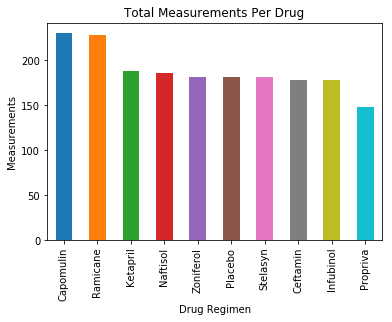

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
number=final_df["Drug Regimen"].value_counts()
number.plot(kind='bar')
plt.title("Total Measurements Per Drug")
plt.ylabel("Measurements")
plt.xlabel("Drug Regimen")
plt.show()

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#x_axis=np.arange(number)
#plt.bar(x_axis, )

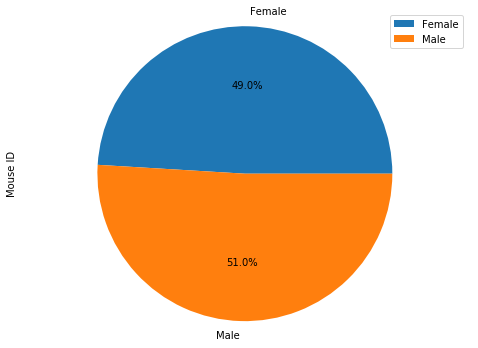

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
final_df.groupby(['Sex']).count().plot(kind='pie', y='Mouse ID', figsize=(8,6), autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs=['Capomulin', 'Ramicane','Infubinol','Ceftamin']
four_regimens=final_df.loc[final_df['Drug Regimen'].isin(drugs)]

# Start by getting the last (greatest) timepoint for each mouse
max_timept=four_regimens.groupby('Mouse ID')['Timepoint'].max()
max_timept=max_timept.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_final_df=pd.merge(max_timept, four_regimens, on=['Mouse ID','Timepoint'])
#four_final_df

In [24]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset   
    # Determine outliers using upper and lower bounds
for each_drug in drugs:
    #print(each_drug)
    filter_df=four_final_df.loc[:, 'Drug Regimen']==each_drug
    #print(len(final_df.loc[filter_df, :]))
    filter_again=four_final_df.loc[filter_df,'Tumor Volume (mm3)']
    #print(filter_again)
    quartiles=filter_again.quantile([.25,.5,.75])
    #print(quartiles)
    
    #iqr range
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)

    #print(lower_bound)
    print(f"{each_drug}:")
    print(f"The lower quartile for {each_drug} is: {lowerq}")
    print(f"The upper quartile for {each_drug} is: {upperq}")
    print(f"The IQR for {each_drug} is: {iqr}")
    subset_filter=(filter_again<lower_bound) | (filter_again>upper_bound)
    #print(subset_filter)
    outlier=filter_again[subset_filter]
    print(f'The outlier for {each_drug} is {outlier}')
    print("--"*20)

Capomulin:
The lower quartile for Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
The IQR for Capomulin is: 7.781863460000004
The outlier for Capomulin is Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------------------
Ramicane:
The lower quartile for Ramicane is: 31.56046955
The upper quartile for Ramicane is: 40.65900627
The IQR for Ramicane is: 9.098536719999998
The outlier for Ramicane is Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------------------
Infubinol:
The lower quartile for Infubinol is: 54.04860769
The upper quartile for Infubinol is: 65.52574285
The IQR for Infubinol is: 11.477135160000003
The outlier for Infubinol is 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
----------------------------------------
Ceftamin:
The lower quartile for Ceftamin is: 48.72207785
The upper quartile for Ceftamin is: 64.29983003
The IQR for Ceftamin is: 15.577752179999997
The outlier for Ceftami

In [32]:
four_final_df.head(1)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2


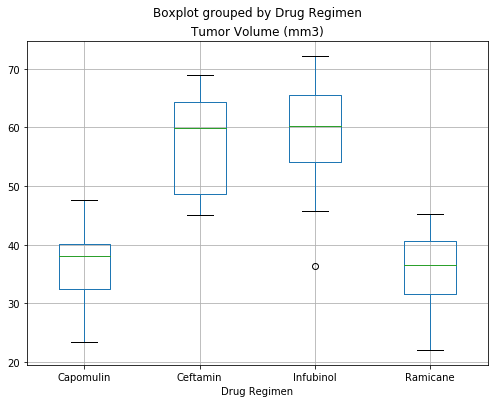

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
bp=four_final_df.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen", figsize=(8,6))

## Line and Scatter Plots

In [23]:
four_final_df.head(1)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2


In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. avg mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for avg mouse weight and average tumor volume for the Capomulin regimen

# Correlation Coefficient
#weight=df_TBD.iloc[:,column index]
#tumor_vol=df_TBD.iloc[:,column index]
#correlation=st.pearsonr(weight,tumor_vol)

# Scatterplot for Linear Regression Model
#plt.scatter(weight,tumor_vol)
#plt.xticks(weight, rotation=90)
#plt.xlabel('Weight')
#plt.ylabel('Tumor Volume (mm3)')

# if scatterplot works, do the lines below and put the scatterplot data below it and also ENTER 
#(after "plt.scatter()" line ---> plt.plot(weight, tv_fit, "--")

# Liner regression for weight vs tumor_vol
#tv_slope, tv_int, tv_r, tv_p, tv_std_err = stats.lineregress(weight, tumor_vol)

# Create quation for line to calculate predicted tumor_vol
#tv_fit = tv_slope * weight + tv_int